In [ ]:
import nanslice.jupyter as ns
import h5py

In [ ]:
matrix = 64
read_os = 2
snr = 100
chan = 16
rings = 2
!rm *.h5
!rm *.nii

# Reference Data Set

First simulate a reference phantom dataset with no dead-time gap and extract SENSE maps with eSPIRIT and direct extraction

In [ ]:
!riesling phantom --matrix=$matrix --read=$read_os --snr=$snr --channels=$chan --rings=$rings --shepp_logan --kb full
!riesling sense --kb full.h5 --sense="espirit" --maps -o full-espirit

In [ ]:
ns.timeseries('full-espirit-sense-maps.nii', component='mag')

In [ ]:
ns.timeseries('full-espirit-sense-maps.nii', component='phase', clim=(-3.141, 3.141))

In [ ]:
!riesling sense --kb full.h5 --sense="direct" --maps -o full-direct

In [ ]:
!riesling phantom --matrix=$matrix --read=$read_os --snr=$snr --channels=$chan --rings=$rings --shepp_logan --kb gap --gap=3
!riesling sense --kb gap.h5 --sense="espirit" --maps -o gap-espirit

In [ ]:
ns.timeseries('gap-espirit-sense-maps.nii', component='mag')

# Gap Data

Now simulate a phantom including a dead-time gap and repeat the above. Note how the directly-extracted maps are corrupted

Is complex


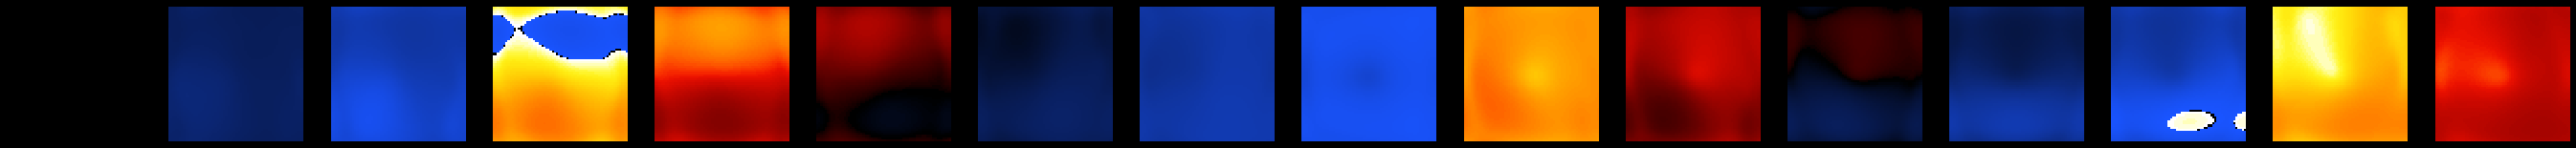

In [ ]:
ns.timeseries('gap-espirit-sense-maps.nii', component='phase', clim=(-3.141, 3.141))

In [ ]:
ns.timeseries('full-direct-sense-maps.nii', component='mag')

In [ ]:
ns.timeseries('full-direct-sense-maps.nii', component='phase', clim=(-3.141, 3.141))

In [ ]:
!riesling sense --kb gap.h5 --sense="direct" --maps -o gap-direct

In [ ]:
ns.timeseries('gap-direct-sense-maps.nii', component='mag')

In [ ]:
ns.timeseries('gap-direct-sense-maps.nii', component='phase', clim=(-3.141, 3.141))

# Iterative Reconstructions

Now perform some iterative recons and compare the results. These will take a while to run

In [ ]:
!riesling cg --kb full.h5 --sense="espirit" -o full-espirit
!riesling cg --kb full.h5 --sense="direct" -o full-direct
!riesling cg --kb gap.h5 --sense="espirit" -o gap-espirit
!riesling cg --kb gap.h5 --sense="direct" -o gap-direct

In [ ]:
ns.compare('full-espirit-cg.nii', 'full-direct-cg.nii', component='mag')

In [ ]:
ns.compare('gap-espirit-cg.nii', 'gap-direct-cg.nii', component='mag')

In [ ]:
ns.compare('full-direct-cg.nii', 'gap-direct-cg.nii', component='mag')

In [ ]:
ns.compare('full-espirit-cg.nii', 'gap-espirit-cg.nii', component='mag', diff_clim=(-15,15))